<a href="https://colab.research.google.com/github/pyANSH/lp3/blob/main/ml_p3_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dt = pd.read_csv('https://raw.githubusercontent.com/pyANSH/lp3/main/dataset/Churn_Modelling.csv')
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dt = dt.drop(columns=['RowNumber','CustomerId','Surname',])

In [ ]:
dt.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

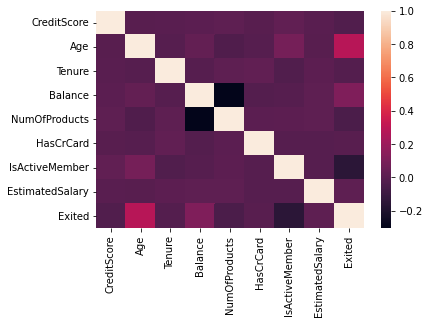

In [ ]:

import seaborn as sn
sn.heatmap(dt.corr())

In [ ]:
dt=dt.drop(columns=['IsActiveMember'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
dt['Geography'] = lr.fit_transform(dt['Geography'])

In [ ]:
dt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,113931.57,1
3,699,0,Female,39,1,0.00,2,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,79084.10,0


In [ ]:
dt.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
dt['Gender'] = lr.fit_transform(dt['Gender'])
x = dt.drop(columns=['Exited'])
y= dt['Exited']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
x_train = sr.fit_transform(x_train)
x_test = sr.fit_transform(x_test)

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers
classifier = Sequential()
classifier.add(Dense(activation = "relu",input_dim = 9,units = 6,kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crosse
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last
classifier.fit(x_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 60        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
800/800 [==============================] - 2s 1ms/step - loss: 0.4874 - accuracy: 0.7965
Epoch 2/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.7970
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.7970
Epoch 4/50
800/800 [

In [ ]:
from sklearn.metrics import classification_report
y_pred =classifier.predict(x_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 731us/step
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1587
           1       0.61      0.18      0.28       413

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.78      0.81      0.76      2000

